In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
data=pd.read_csv("/content/drive/My Drive/Recommendation/Project/ratings_Electronics_Ver3.tar-1.xz")

In [0]:
data.columns = ["userId","productId","rating", "timestamp"]

In [10]:
data.head()

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
1,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
2,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
3,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09
4,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09


In [11]:
data.shape

(7824482, 4)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), object(2)
memory usage: 238.8+ MB


In [14]:
data.isnull().sum()

userId       1
productId    1
rating       1
timestamp    1
dtype: int64

In [0]:
data.dropna(inplace=True)

In [16]:
data.shape

(7824481, 4)

In [19]:
data.userId.unique().shape

(4201696,)

In [20]:
data.productId.unique().shape

(476001,)

In [0]:
ratings = pd.DataFrame(data.groupby('productId')['rating'].mean())

In [23]:
ratings.head()

,rating
productId,
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
0558835155,3.000000


In [0]:
ratings['number_of_ratings'] = data.groupby('productId')['rating'].count()

In [25]:
ratings.head()

,rating,number_of_ratings
productId,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


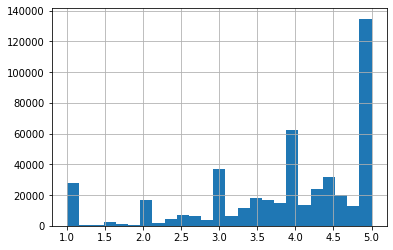

In [27]:
ratings['rating'].hist(bins=25)

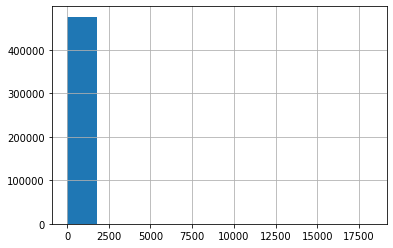

In [28]:
ratings['number_of_ratings'].hist()

There are 4201696 number of users and 476001 number are products. Most of them rated 5.

# Take a subset of the dataset to make it less sparse/ denser

In [0]:
counts = data['userId'].value_counts()

In [30]:
counts

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
AYCIDL39LWNCJ       1
A2UW2TS5QOQP5U      1
A19Z3FRY15UOBV      1
ABFVCUXFOJ2V        1
A2Y7FQD5LCXBTL      1
Name: userId, Length: 4201696, dtype: int64

In [35]:
new_data = data[data['userId'].isin(counts[counts>=50].index)]
new_data.shape

(125871, 4)

In [36]:
counts = new_data['userId'].value_counts()
counts

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A233TZONT1OGR0     50
ACH055GTTIGC9      50
A1QLQCJVGCQPP0     50
A1LA4K5JF78BER     50
A20ZM879PCQQEZ     50
Name: userId, Length: 1540, dtype: int64

In [37]:
new_data

,userId,productId,rating,timestamp
93,A3BY5KCNQZXV5U,0594451647,5.0,1.390176e+09
117,AT09WGFUM934H,0594481813,3.0,1.377907e+09
176,A32HSNCNPRUMTR,0970407998,1.0,1.319674e+09
177,A17HMM1M7T9PJ1,0970407998,4.0,1.281744e+09
491,A3CLWR1UUZT6TG,0972683275,5.0,1.373587e+09
...,...,...,...,...
7824425,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,1.405642e+09
7824426,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,1.405210e+09
7824435,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,1.405296e+09
7824437,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,1.405210e+09


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
new_data = new_data.sample(frac = 0.1) #taking 10 percent of data

In [40]:
new_data.shape

(12587, 4)

In [0]:
train_data, test_data = train_test_split(new_data, test_size=.30, random_state=100)

In [42]:
train_data.head()

,userId,productId,rating,timestamp
7361810,A20DZX38KRBIT8,B00D68ZVY8,5.0,1.390349e+09
3890382,A1H55L0BLPCWYF,B0045IIZKU,4.0,1.379030e+09
4003851,A38NELQT98S4H8,B004BLIQ5K,5.0,1.292976e+09
960367,AOEAD7DPLZE53,B000G35S08,3.0,1.181779e+09
5623918,A2ZWJVKITA32OV,B00752R9SM,4.0,1.360886e+09


In [43]:
test_data.head()

,userId,productId,rating,timestamp
960581,A1KXJCXS6HFRQZ,B000G36GOU,1.0,1.202256e+09
7572564,A19HKRB4LU5YR,B00EWC0BQ0,3.0,1.384214e+09
6909970,A1F9Z42CFF9IAY,B00AJHDZSI,4.0,1.397866e+09
425401,A3P1508PZ0UADD,B00022VZ0K,4.0,1.217549e+09
1015320,A32O5FZH994CNY,B000HXGIHE,4.0,1.201910e+09


In [44]:
train_data.shape

(8810, 4)

In [45]:
test_data.shape

(3777, 4)

# Build Popularity Recommender model

In [0]:
def popularity_model(data, k = 5):
    ratings_mean_count = data.groupby('productId').agg({'rating': 'count'}).reset_index()
    ratings_mean_count.rename(columns = {'rating': 'score'},inplace=True)
    data_sort = ratings_mean_count.sort_values(['score', 'productId'], ascending = [0,1])
    data_sort['Rank'] = data_sort['score'].rank(ascending=0, method='first')
    return data_sort.head(k)

In [0]:
ratings = popularity_model(train_data,10)

In [48]:
ratings

,productId,score,Rank
5400,B0088CJT4U,20,1.0
1323,B000N99BBC,12,2.0
5353,B00829TIEK,12,3.0
5446,B008DWCRQW,12,4.0
3236,B003ES5ZUU,11,5.0
272,B00007E7JU,10,6.0
1917,B0019EHU8G,10,7.0
2817,B002R5AM7C,10,8.0
2921,B002WE6D44,10,9.0
3869,B004CLYEDC,10,10.0


# Build Collaborative Filtering model.

In [51]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1673632 sha256=0d287d2ff538041743927b12bd359d700cd29c9eacf7385ac3db7d2675463955
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import SVD
from scipy.sparse.linalg import svds
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy

In [0]:
reader = Reader(rating_scale=(1, 5))

In [0]:
model_data = Dataset.load_from_df(new_data[["userId", "productId", "rating"]], reader)

In [0]:
trainset, testset = train_test_split(model_data, test_size=0.3, random_state=100)

In [58]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
predictions = algo.test(testset)

In [60]:
predictions

[Prediction(uid='A25C2M3QF9G7OQ', iid='B00B6ZCNGM', r_ui=5.0, est=4.276617480136209, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3AGQAXTX6VRJ3', iid='B00005ATMB', r_ui=4.0, est=1, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2DS9DLMSU2M2Z', iid='B004D4917W', r_ui=4.0, est=4.276617480136209, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A18U49406IPPIJ', iid='B00CTF8WPE', r_ui=5.0, est=4.276617480136209, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1F1A0QQP2XVH5', iid='B005AZ7BE8', r_ui=5.0, est=4.276617480136209, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A21Q9JVG4SII51', iid='B002SZEOLG', r_ui=3.0, est=4.4, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1T1YSCDW0PD25', iid='B00429N18S', r_ui=4.0, est=4.276617480136209, details={'was_impossible': Tr

In [63]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.1098


1.1097863625688624

# Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [0]:
predictions_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in predictions])

In [0]:
predictions_df.columns = ['userId', 'productId', 'est_rating']

In [0]:
predictions_df.sort_values(by=['userId','est_rating'], ascending=False, inplace=True)

In [67]:
predictions_df.sample(10)

,userId,productId,est_rating
453,A2OTQMC69J8MUI,B009SK57IS,4.276617
781,A3MFORLOKIOEQY,B004DALW5K,4.276617
1214,ASF3J4UYV34KA,B008DW95NA,4.276617
330,A1RDHBBZE1NPS3,B00AEKEA48,4.276617
2527,A1MFAPVBW9BEGD,B003374OWW,4.276617
1041,A33775AIB1A664,B004V4HLCG,4.276617
3673,AFH97KY1SBP2C,B0025T1HM4,4.276617
1532,A3OXHLG6DIBRW8,B002U0KGEI,4.276617
2607,A2VALCFTOWFYXZ,B00CGYP3D2,4.276617
2569,AT28RL25Q2OLK,B0018CWY3A,5.000000


In [68]:
predictions_df.groupby('userId').head(10).reset_index(drop=True)

,userId,productId,est_rating
0,AZOK5STV85FBJ,B0035TZS14,4.276617
1,AZNUHQSHZHSUE,B000A6AXHE,4.276617
2,AZNUHQSHZHSUE,B007X3VEC0,4.276617
3,AZMY6E8B52L2T,B00FMTIUD8,5.000000
4,AZMY6E8B52L2T,B001FS1Q1S,5.000000
...,...,...,...
3721,A105S56ODHGJEK,B006WHPQE0,3.000000
3722,A100WO06OQR8BQ,B003I4FIKW,4.276617
3723,A100WO06OQR8BQ,B009F7ESIY,4.276617
3724,A100WO06OQR8BQ,B0046SUPQQ,3.000000


In [72]:
predictions_df[predictions_df.userId == 'AZMY6E8B52L2T'].head(5)

,userId,productId,est_rating
214,AZMY6E8B52L2T,B00FMTIUD8,5.000000
1114,AZMY6E8B52L2T,B001FS1Q1S,5.000000
1700,AZMY6E8B52L2T,B00EDCF0MY,5.000000
620,AZMY6E8B52L2T,B00EIDWYR2,4.276617
1422,AZMY6E8B52L2T,B0041TF4QQ,4.276617
